# **파이프라인을 사용한 효율적인 워크플로**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
'machine-learning-databases'
'/breast-cancer-wisconsin/wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('테스트 정확도: %.3f' % pipe_lr.score(X_test, y_test))

테스트 정확도: 0.956


In [ ]:
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display='diagram')
pipe_lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])



---



In [ ]:
from sklearn.datasets import load_wine

In [ ]:
# 와인 데이터셋 불러오기
wine = load_wine()
X = wine.data  # 특성 데이터
y = wine.target  # 레이블 데이터

In [ ]:
df_wine = pd.DataFrame(X, columns=wine.feature_names)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
X = df_wine.iloc[:, 2:].values
y = df_wine.iloc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array([0.74, 0.89, 0.9 , 0.92, 0.94, 0.98, 0.99, 1.01, 1.07, 1.09, 1.1 ,
       1.13, 1.17, 1.19, 1.21, 1.24, 1.25, 1.29, 1.33, 1.34, 1.35, 1.36,
       1.39, 1.41, 1.43, 1.45, 1.47, 1.48, 1.5 , 1.51, 1.52, 1.53, 1.57,
       1.59, 1.6 , 1.61, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.7 , 1.71,
       1.72, 1.73, 1.75, 1.76, 1.77, 1.78, 1.8 , 1.81, 1.83, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.92, 1.95, 1.97, 1.99, 2.02, 2.05, 2.06, 2.08,
       2.12, 2.13, 2.15, 2.16, 2.31, 2.36, 2.39, 2.4 , 2.43, 2.45, 2.46,
       2.51, 2.55, 2.56, 2.58, 2.59, 2.67, 2.68, 2.76, 2.81, 2.83, 2.89,
       2.96, 2.99, 3.03, 3.1 , 3.12, 3.17, 3.24, 3.26, 3.27, 3.3 , 3.37,
       3.43, 3.45, 3.55, 3.57, 3.59, 3.7 , 3.74, 3.8 , 3.83, 3.84, 3.86,
       3.87, 3.88, 3.9 , 3.91, 3.98, 3.99, 4.04, 4.1 , 4.12, 4.28, 4.3 ,
       4.31, 4.36, 4.43, 4.6 , 4.61, 4.72, 4.95, 5.04, 5.19, 5.51, 5.65,
       5.8 ])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('테스트 정확도: %.3f' % pipe_lr.score(X_test, y_test))

테스트 정확도: 0.981


In [ ]:
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display='diagram')
pipe_lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])

# **K겹 교차 검증을 사용한 모델 성능 평가**

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print('폴드: %2d, 클래스 분포: %s, 정확도: %.3f' % (k+1,
                                            np.bincount(y_train[train]), score))

print('\nCV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

폴드:  1, 클래스 분포: [36 45 30], 정확도: 0.923
폴드:  2, 클래스 분포: [37 45 29], 정확도: 0.923
폴드:  3, 클래스 분포: [37 45 29], 정확도: 0.923
폴드:  4, 클래스 분포: [37 45 29], 정확도: 0.923
폴드:  5, 클래스 분포: [37 45 30], 정확도: 1.000
폴드:  6, 클래스 분포: [37 45 30], 정확도: 0.917
폴드:  7, 클래스 분포: [37 45 30], 정확도: 0.917
폴드:  8, 클래스 분포: [37 45 30], 정확도: 1.000
폴드:  9, 클래스 분포: [37 45 30], 정확도: 1.000
폴드: 10, 클래스 분포: [37 45 30], 정확도: 0.917

CV 정확도: 0.944 +/- 0.037


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)

print('CV 정확도 점수: %s' % scores)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV 정확도 점수: [0.92307692 0.92307692 0.92307692 0.92307692 1.         0.91666667
 0.91666667 1.         1.         0.91666667]
CV 정확도: 0.944 +/- 0.037


In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator=pipe_lr,

X=X_train,
y=y_train,
scoring=['accuracy'],
cv=10,
n_jobs=-1)

print('CV 정확도 점수: %s' % scores['test_accuracy'])
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),

np.std(scores['test_accuracy'])))

CV 정확도 점수: [0.92307692 0.92307692 0.92307692 0.92307692 1.         0.91666667
 0.91666667 1.         1.         0.91666667]
CV 정확도: 0.944 +/- 0.037


In [ ]:
from sklearn.model_selection import cross_val_predict

preds = cross_val_predict(estimator=pipe_lr,

X=X_train,
y=y_train,
cv=10,
n_jobs=-1)

preds[:10]

array([0, 1, 2, 1, 0, 2, 1, 0, 0, 0])

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
# 와인 데이터셋 불러오기
wine = load_wine()
X = wine.data  # 특성 데이터
y = wine.target  # 레이블 데이터

In [ ]:
df_wine = pd.DataFrame(X, columns=wine.feature_names)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
X = df_wine.iloc[:, 2:].values
y = df_wine.iloc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array([0.74, 0.89, 0.9 , 0.92, 0.94, 0.98, 0.99, 1.01, 1.07, 1.09, 1.1 ,
       1.13, 1.17, 1.19, 1.21, 1.24, 1.25, 1.29, 1.33, 1.34, 1.35, 1.36,
       1.39, 1.41, 1.43, 1.45, 1.47, 1.48, 1.5 , 1.51, 1.52, 1.53, 1.57,
       1.59, 1.6 , 1.61, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.7 , 1.71,
       1.72, 1.73, 1.75, 1.76, 1.77, 1.78, 1.8 , 1.81, 1.83, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.92, 1.95, 1.97, 1.99, 2.02, 2.05, 2.06, 2.08,
       2.12, 2.13, 2.15, 2.16, 2.31, 2.36, 2.39, 2.4 , 2.43, 2.45, 2.46,
       2.51, 2.55, 2.56, 2.58, 2.59, 2.67, 2.68, 2.76, 2.81, 2.83, 2.89,
       2.96, 2.99, 3.03, 3.1 , 3.12, 3.17, 3.24, 3.26, 3.27, 3.3 , 3.37,
       3.43, 3.45, 3.55, 3.57, 3.59, 3.7 , 3.74, 3.8 , 3.83, 3.84, 3.86,
       3.87, 3.88, 3.9 , 3.91, 3.98, 3.99, 4.04, 4.1 , 4.12, 4.28, 4.3 ,
       4.31, 4.36, 4.43, 4.6 , 4.61, 4.72, 4.95, 5.04, 5.19, 5.51, 5.65,
       5.8 ])

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print('폴드: %2d, 클래스 분포: %s, 정확도: %.3f' % (k+1,
                                            np.bincount(y_train[train]), score))

print('\nCV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

폴드:  1, 클래스 분포: [36 45 30], 정확도: 0.923
폴드:  2, 클래스 분포: [37 45 29], 정확도: 0.923
폴드:  3, 클래스 분포: [37 45 29], 정확도: 0.923
폴드:  4, 클래스 분포: [37 45 29], 정확도: 0.923
폴드:  5, 클래스 분포: [37 45 30], 정확도: 1.000
폴드:  6, 클래스 분포: [37 45 30], 정확도: 0.917
폴드:  7, 클래스 분포: [37 45 30], 정확도: 0.917
폴드:  8, 클래스 분포: [37 45 30], 정확도: 1.000
폴드:  9, 클래스 분포: [37 45 30], 정확도: 1.000
폴드: 10, 클래스 분포: [37 45 30], 정확도: 0.917

CV 정확도: 0.944 +/- 0.037


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)

print('CV 정확도 점수: %s' % scores)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV 정확도 점수: [0.92307692 0.92307692 0.92307692 0.92307692 1.         0.91666667
 0.91666667 1.         1.         0.91666667]
CV 정확도: 0.944 +/- 0.037


In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator=pipe_lr,

X=X_train,
y=y_train,
scoring=['accuracy'],
cv=10,
n_jobs=-1)

print('CV 정확도 점수: %s' % scores['test_accuracy'])
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),

np.std(scores['test_accuracy'])))

CV 정확도 점수: [0.92307692 0.92307692 0.92307692 0.92307692 1.         0.91666667
 0.91666667 1.         1.         0.91666667]
CV 정확도: 0.944 +/- 0.037


# **학습 곡선과 검증 곡선을 사용한 알고리즘 디버깅**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           max_iter=10000))

train_sizes, train_scores, test_scores =\
learning_curve(estimator=pipe_lr,
               X=X_train,
               y=y_train,
               train_sizes=np.linspace(0.1, 1.0, 10),
               cv=10,
               n_jobs=1)

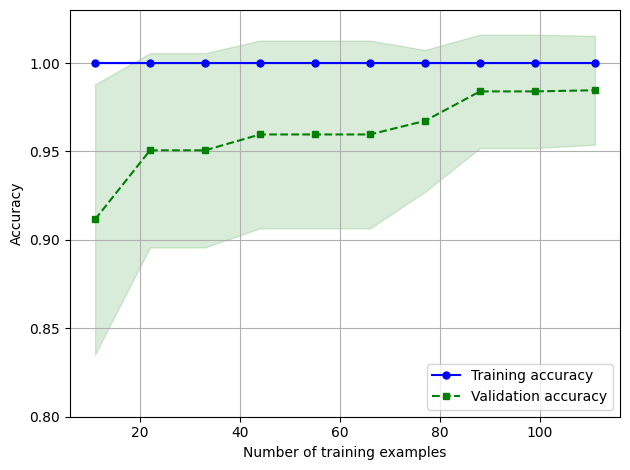

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
color='green', linestyle= '--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    param_name=
    'logisticregression__C',
    param_range=param_range,
    cv=10)

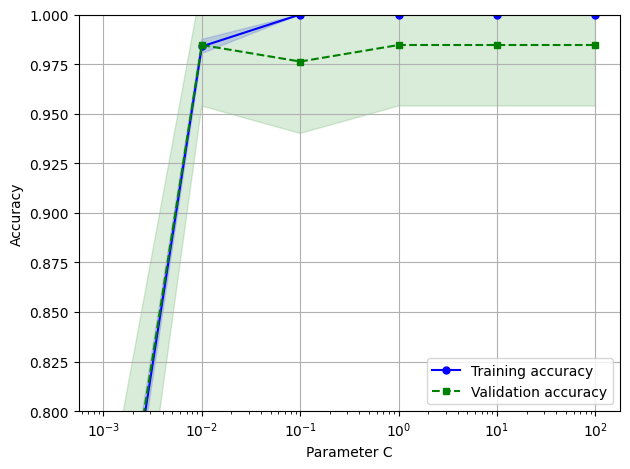

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle= '--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(param_range,
test_mean + test_std,
test_mean - test_std,
alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()



---



In [ ]:
from sklearn.datasets import load_wine

In [ ]:
# 와인 데이터셋 불러오기
wine = load_wine()
X = wine.data  # 특성 데이터
y = wine.target  # 레이블 데이터

In [ ]:
df_wine = pd.DataFrame(X, columns=wine.feature_names)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
X = df_wine.iloc[:, 2:].values
y = df_wine.iloc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array([0.74, 0.89, 0.9 , 0.92, 0.94, 0.98, 0.99, 1.01, 1.07, 1.09, 1.1 ,
       1.13, 1.17, 1.19, 1.21, 1.24, 1.25, 1.29, 1.33, 1.34, 1.35, 1.36,
       1.39, 1.41, 1.43, 1.45, 1.47, 1.48, 1.5 , 1.51, 1.52, 1.53, 1.57,
       1.59, 1.6 , 1.61, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.7 , 1.71,
       1.72, 1.73, 1.75, 1.76, 1.77, 1.78, 1.8 , 1.81, 1.83, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.92, 1.95, 1.97, 1.99, 2.02, 2.05, 2.06, 2.08,
       2.12, 2.13, 2.15, 2.16, 2.31, 2.36, 2.39, 2.4 , 2.43, 2.45, 2.46,
       2.51, 2.55, 2.56, 2.58, 2.59, 2.67, 2.68, 2.76, 2.81, 2.83, 2.89,
       2.96, 2.99, 3.03, 3.1 , 3.12, 3.17, 3.24, 3.26, 3.27, 3.3 , 3.37,
       3.43, 3.45, 3.55, 3.57, 3.59, 3.7 , 3.74, 3.8 , 3.83, 3.84, 3.86,
       3.87, 3.88, 3.9 , 3.91, 3.98, 3.99, 4.04, 4.1 , 4.12, 4.28, 4.3 ,
       4.31, 4.36, 4.43, 4.6 , 4.61, 4.72, 4.95, 5.04, 5.19, 5.51, 5.65,
       5.8 ])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('테스트 정확도: %.3f' % pipe_lr.score(X_test, y_test))

테스트 정확도: 0.981


In [ ]:
# train_mean과 test_mean의 길이에 맞게 train_sizes를 슬라이싱
train_sizes = train_sizes[:len(train_mean)]

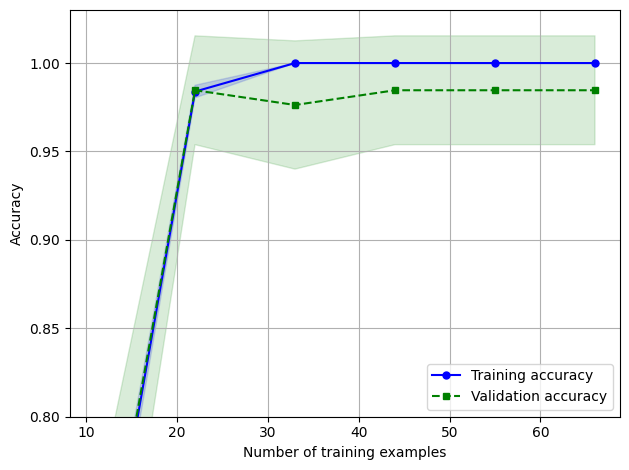

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
color='green', linestyle= '--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    param_name=
    'logisticregression__C',
    param_range=param_range,
    cv=10)

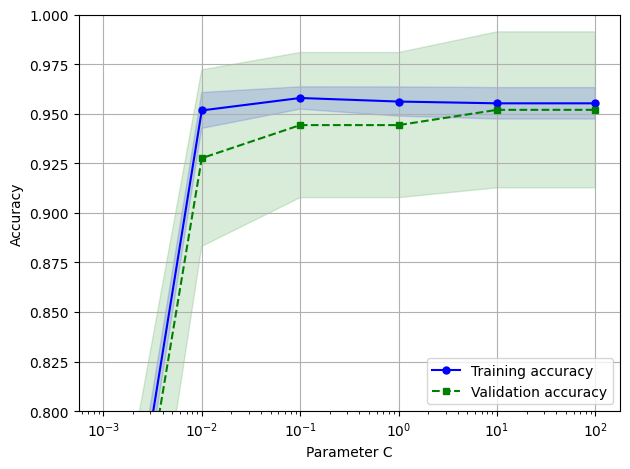

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle= '--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(param_range,
test_mean + test_std,
test_mean - test_std,
alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

# **그리드 서치를 사용한 머신 러닝 모델 세부 튜닝**

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),

SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range,

'svc__kernel': ['linear']},
{'svc__C': param_range,'svc__gamma': param_range,

'svc__kernel': ['rbf']}]

NameError: name 'make_pipeline' is not defined

In [ ]:
gs = GridSearchCV(estimator=pipe_svc,
param_grid=param_grid,
scoring='accuracy',
refit=True,
cv=10,
n_jobs=-1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)